# Plots

In [1]:
library('dplyr')
library('ggplot2')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Syntax

- ggplot2 works with dataframes<br>
- it uses layers to build a final plot
- Cheatsheat: https://github.com/rstudio/cheatsheets/blob/main/data-visualization-2.1.pdf

## ggplot()

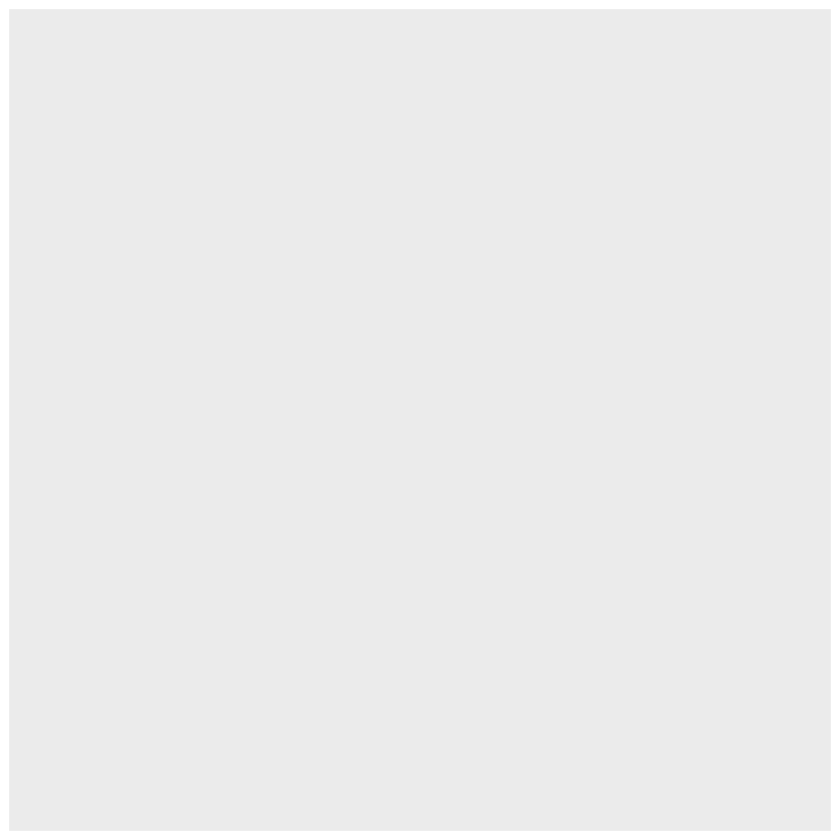

In [ ]:
# creates an empty graph, dataframe, data selection, type of graphing and aestethics need to be added
ggplot()

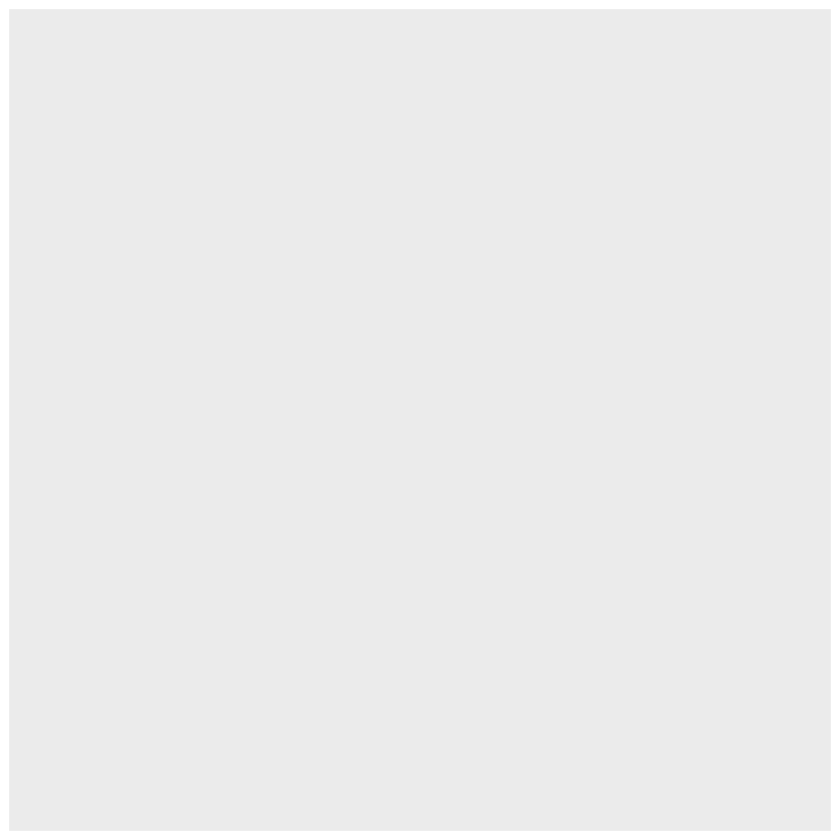

In [ ]:
# now the dataframe was added, but we need to specify what columns and what type of graph we want to see
mtcars %>% ggplot()

aes() defines an aesthetic mappings<br>
describes what data and how these variables are mapped to geoms<br>
can be used in ggplot() or geoms

- x, y values
- color, fill - names of colors or colors in hexa codes
- linetype - int or string 0-6 values
- size
- shape

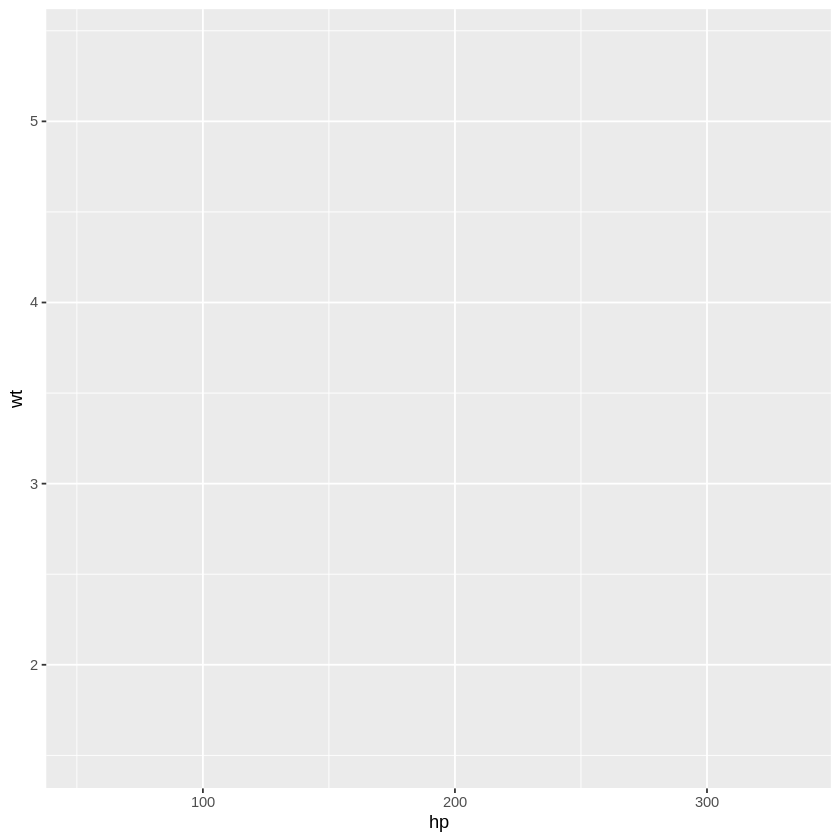

In [ ]:
# here the x and y was specified through parametr aes()
# but still nothing can be seen in the plot, we actualy just added axes
mtcars %>% ggplot(aes(x=hp,y=wt))

## Specifiyng geoms

To be able to actualy see the data in the plot <br>
we need to specify a type of visualisation 

### Two variables
- geom_point()
- geom_line()
- geom_smooth(method=) 
- geom_text()
- geom_label()
- geom_quantile()

### One variable
geom_bar() and geom_col() can both be used for creation of bar plots<br>
- geom_bar() # default stat = 'count'
- geom_col() # default stat = 'identity'
- geom_area()
- geom_density()
- geom_histogram()
- geom_qq()

### Statistical tools
- geom_boxplot()
- geom_violin()
- geom_errorbar()
- geom_linerange()

## Stats
An alternative way how to work with data and prepare them for plotting<br>
- geom_bar(stat='identity)
- stat_geom(stat='summary', fun='max')

### vs

- stat_count()
- stat_identity()
- stat_summary(data.fun='mean', ....)


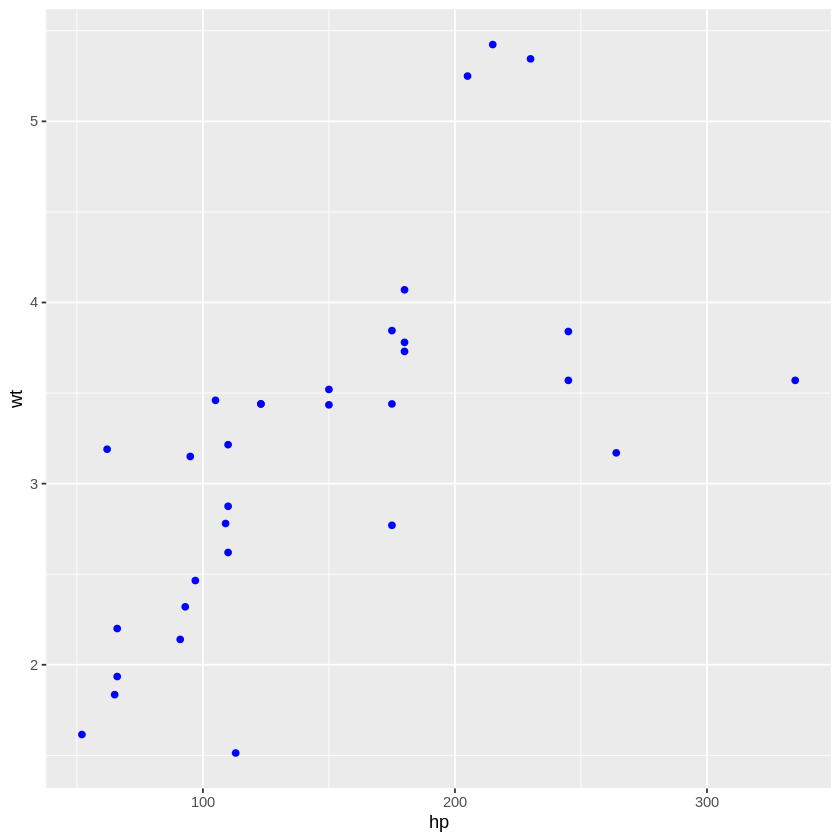

In [ ]:
mtcars %>% ggplot(aes(x=hp, y=wt,)) + geom_point(color='blue')

`geom_smooth()` using formula 'y ~ x'



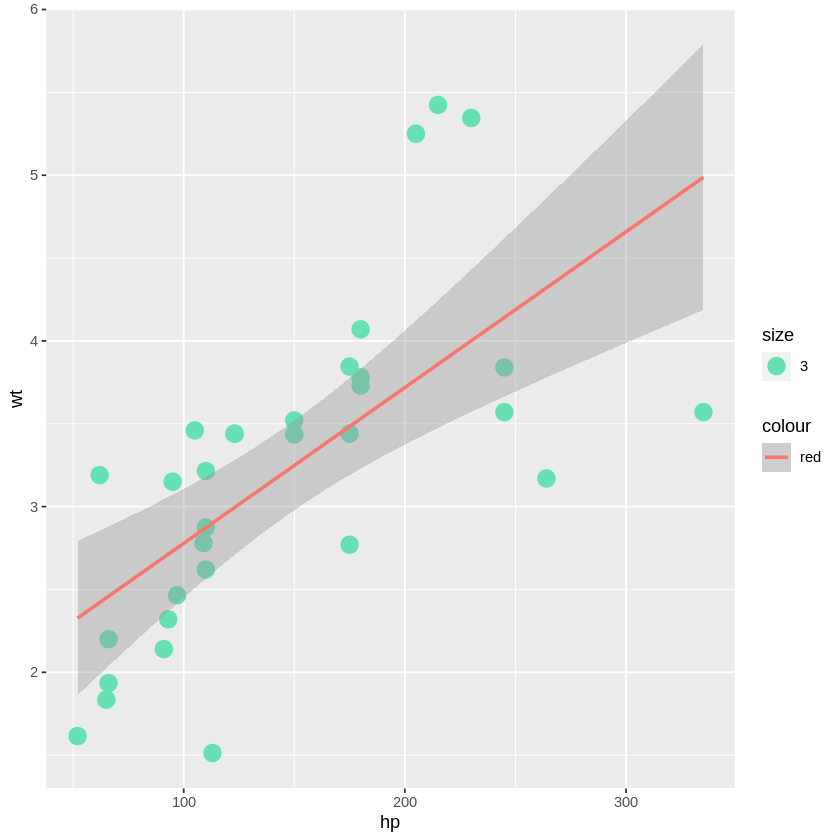

In [13]:
g <- mtcars %>% ggplot(aes(x=hp, y=wt,)) + 
               geom_point(color='#67e0b3', aes(size=3)) + 
               geom_smooth(method="lm", aes(color='red'))
plot(g)

In [ ]:
# Exercise 1:
# Create a scatter plot for iris dataset
# plot Petal.length vs Petal.Width and color datapoints by Species 

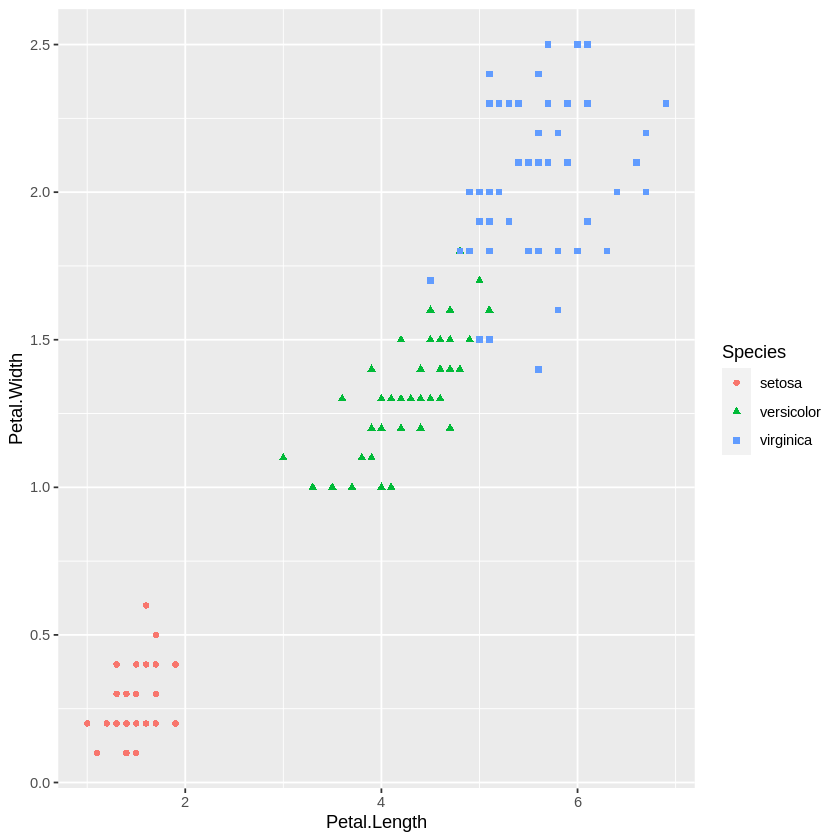

In [ ]:
g = ggplot(iris, aes(Petal.Length, Petal.Width)) + 
    geom_point(aes(color=Species, shape=Species))

plot(g)

In [ ]:
# Exercise 2
# Create a barplots of the mean values for the Sepal or Petal of your choice in the iris dataset

# hint: Species on the x axis, mean on the y axis

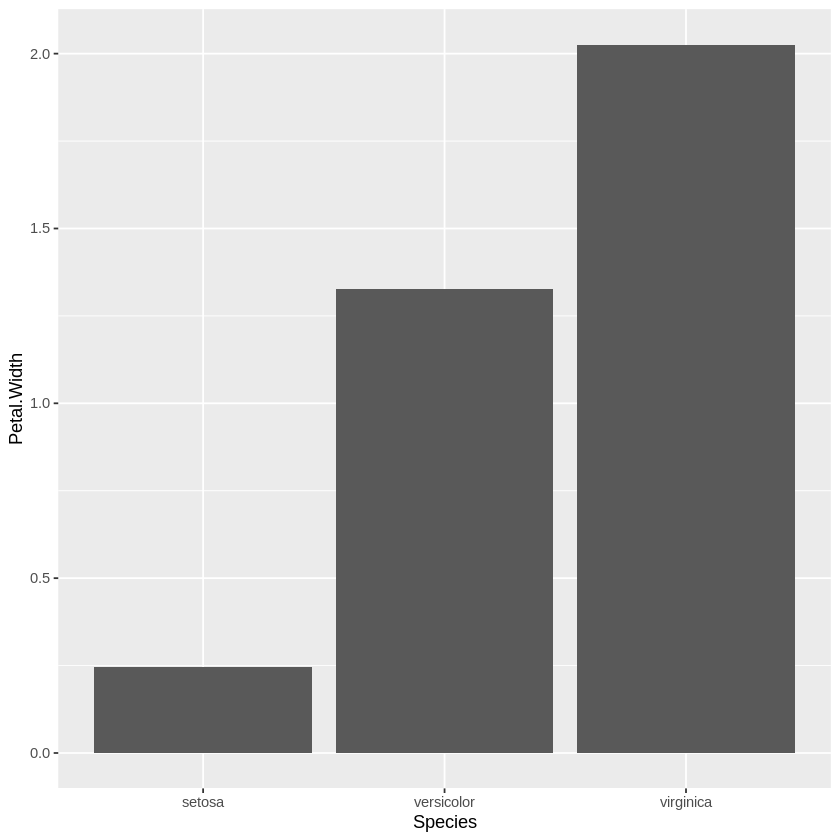

In [14]:
df_iris_agg <- aggregate(iris[,1:4], by=list(iris$Species), FUN=mean)
df_iris_agg <- df_iris_agg %>% rename(Species = Group.1) 
ggplot(df_iris_agg, aes(x=Species, y=Petal.Width)) +
       geom_col()

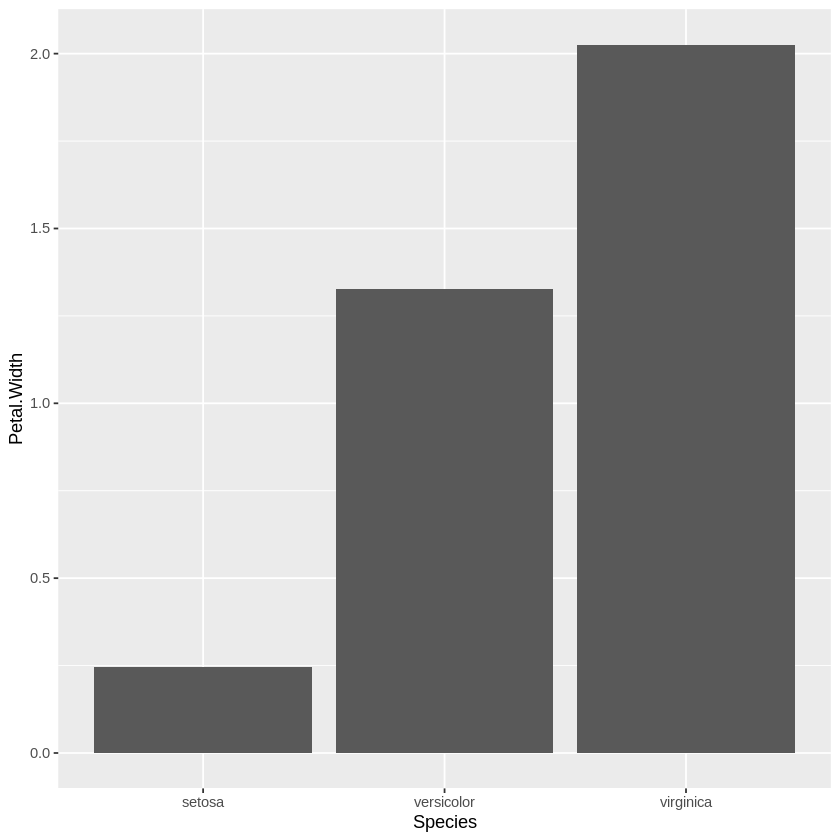

In [ ]:
# or using geom bar and stats
ggplot(iris, aes(x=Species, y=Petal.Width)) +
       geom_bar(stat='summary', fun.data='mean')

### Error bars

In [ ]:
Group_v <- c('A', 'B', 'C', 'D', 'E')
Mean_v <- c(27, 35, 29, 25, 28)
SD_v <- c(2, 3, 4, 3, 2)
dummy_df <- data.frame(Group_v, Mean_v, SD_v)
dummy_df

Group_v,Mean_v,SD_v
<chr>,<dbl>,<dbl>
A,27,2
B,35,3
C,29,4
D,25,3
E,28,2


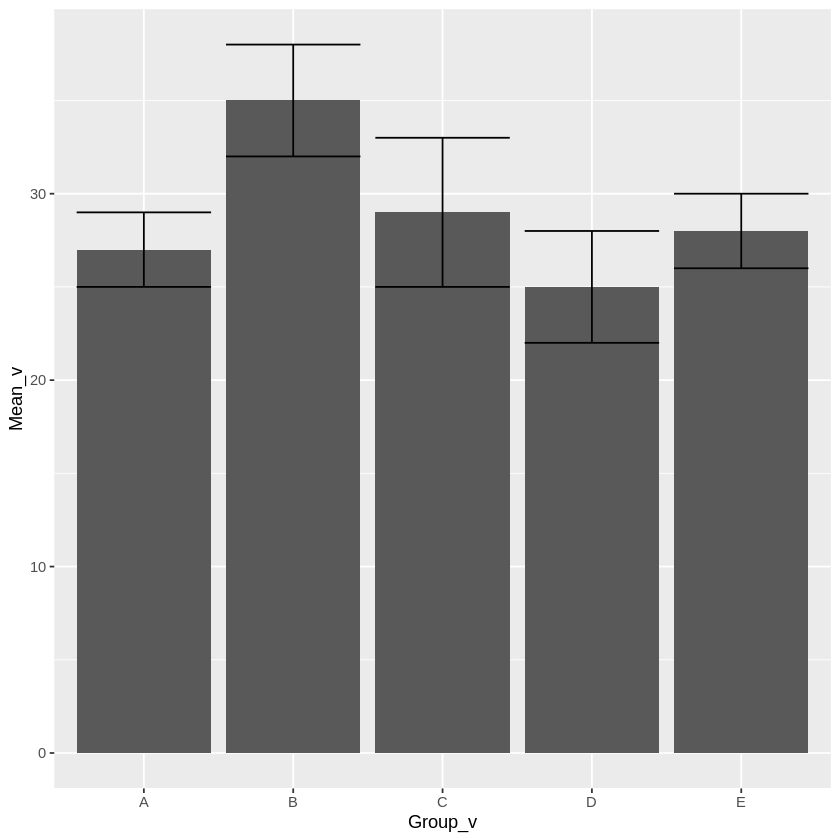

In [ ]:
ggplot(dummy_df,aes(Group_v,Mean_v)) + geom_bar(stat="identity") + 
                                       geom_errorbar(aes(x=Group_v, ymin=Mean_v-SD_v, ymax=Mean_v+SD_v))

In [ ]:
# Exercise 2
# Create a violin plots for each country for the following dataset
# 'https://web.vscht.cz/~spiwokv/statistika/doziti.txt'
# hint: Countries on the x axis, mean on the y axis

In [ ]:
URL = 'https://web.vscht.cz/~spiwokv/statistika/doziti.txt'
data <- read.csv(URL, sep=' ')

In [ ]:
head(data)

,Year,Switzerland,Czechia,Germany,Slovakia
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1960,71.31341,70.34878,69.31002,69.92366
2,1961,71.64488,70.51268,69.50800,70.25085
3,1962,71.19610,69.78683,69.69154,70.47229
4,1963,71.18756,70.30439,69.85961,70.59493
5,1964,72.07780,70.45951,70.01371,70.63278
6,1965,72.20171,70.16317,70.15183,70.60337


## Melting the data frame

In [ ]:
install.packages('reshape2')
# https://cran.r-project.org/web/packages/reshape2/reshape2.pdf

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [ ]:
library('reshape2')

URL = 'https://web.vscht.cz/~spiwokv/statistika/doziti.txt'
data <- read.csv(URL, sep=' ')

df_melted <- melt(data[,2:5], 
                  variable.name='Country',
                  value.name='life_expectancy')
head(df_melted)

No id variables; using all as measure variables



,Country,life_expectancy
,<fct>,<dbl>
1,Switzerland,71.31341
2,Switzerland,71.64488
3,Switzerland,71.19610
4,Switzerland,71.18756
5,Switzerland,72.07780
6,Switzerland,72.20171


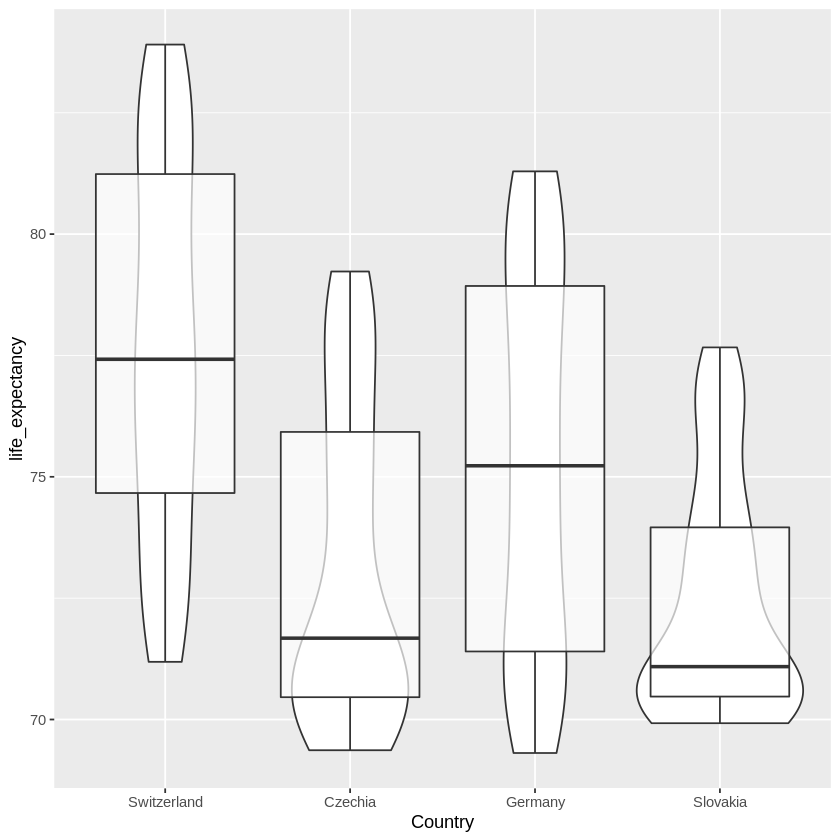

In [ ]:
ggplot(df_melted, aes(x=Country, y=life_expectancy)) + geom_violin() + geom_boxplot(alpha=0.7) # notice that layer boxplot can be added above violin plots

In [ ]:
# Lets plot the iris again
# this time all variables in one graph
# again Species on X axis, mean values on y axis

In [ ]:
# 1) aggregate the data by species and melt them into new dataframe
# 2) plot the data using geom_bar and position='dodge' parameter

In [15]:
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [16]:
library('reshape2')

df_iris_agg_melted <- melt(df_iris_agg, id.vars=c('Species'))
df_iris_agg_melted

Species,variable,value
<fct>,<fct>,<dbl>
setosa,Sepal.Length,5.006
versicolor,Sepal.Length,5.936
virginica,Sepal.Length,6.588
setosa,Sepal.Width,3.428
versicolor,Sepal.Width,2.770
virginica,Sepal.Width,2.974
setosa,Petal.Length,1.462
versicolor,Petal.Length,4.260
virginica,Petal.Length,5.552


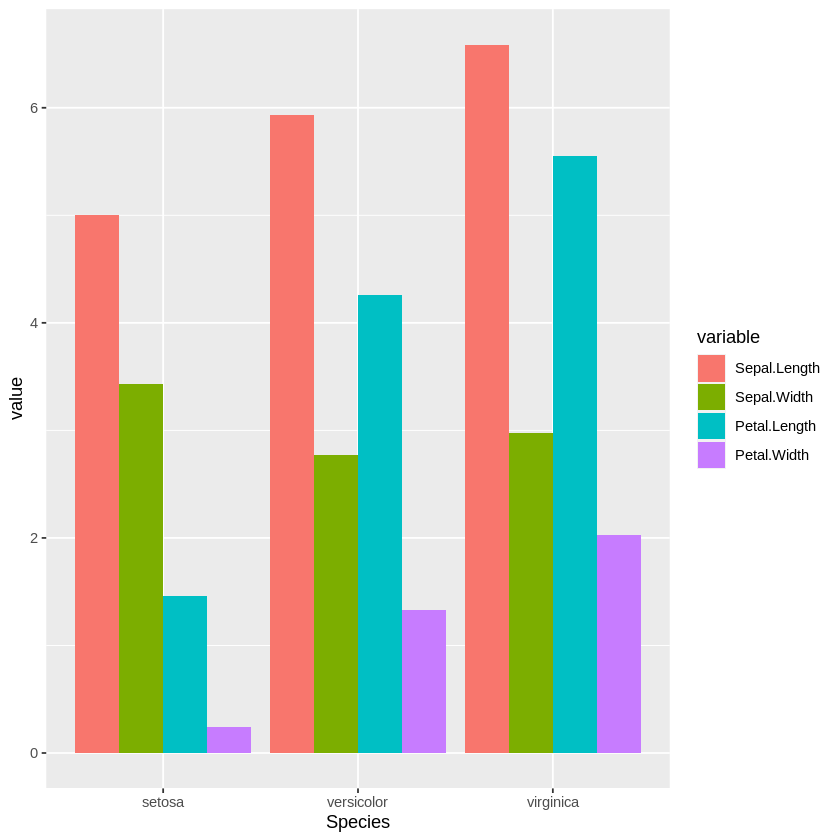

In [23]:
g <- ggplot(df_iris_agg_melted, aes(x=Species, y=value, group=variable, fill=variable)) +
            geom_bar(stat='identity', position='dodge') # parameter position='dodge' will place bars next to each other

plot(g)

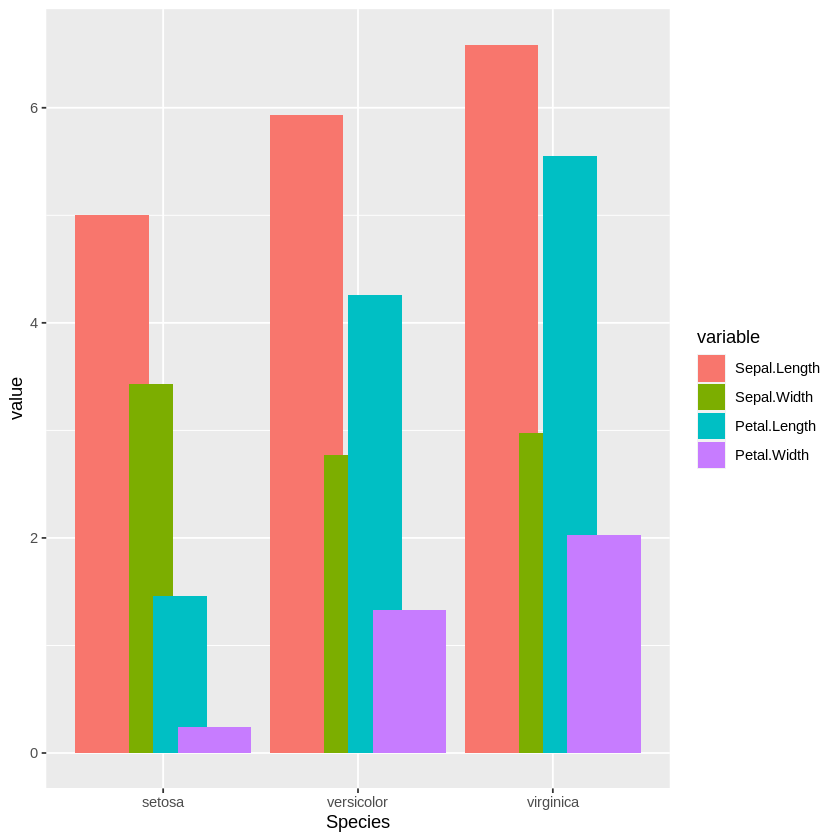

In [24]:
g <- g + geom_bar(stat='identity', position=position_dodge(width=0.5)) # parameter position=position_dodge(width=0.5) can change the placement of the bars
            

plot(g)

# Plot Customizations

- labs()
    - title, subtitle, caption, x, y
- theme(): size, color, hjust, wjust, face, family (font)
    - plot.title=element_text()
    - plot.subtitle=element_text()
    - plot.caption=element_text()
    - axis.title.x=element_text()
    - axis.title.y=element_text()
    - axis.text.x = element_text()
- themes: https://ggplot2.tidyverse.org/reference/ggtheme.html

In [ ]:
# Exercise 3
# Get data: https://web.vscht.cz/~spiwokv/statistika/fas.txt
# index is number of measurement, the first column are height of fathers the second one are heights of their sons in inches
# Plot two histograms each for one column, set name of the plot, size of x and y labels

In [ ]:
install.packages('ggthemes')
library('ggthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map




In [ ]:
URL <- 'https://web.vscht.cz/~spiwokv/statistika/fas.txt'
df_fs_heights <- read.csv(URL, sep=' ')
head(df_fs_heights)

,num,fheight,sheight
,<int>,<dbl>,<dbl>
1,1,65.04851,59.77827
2,2,63.25094,63.21404
3,3,64.95532,63.34242
4,4,65.75250,62.79238
5,5,61.13723,64.28113
6,6,63.02254,64.24221


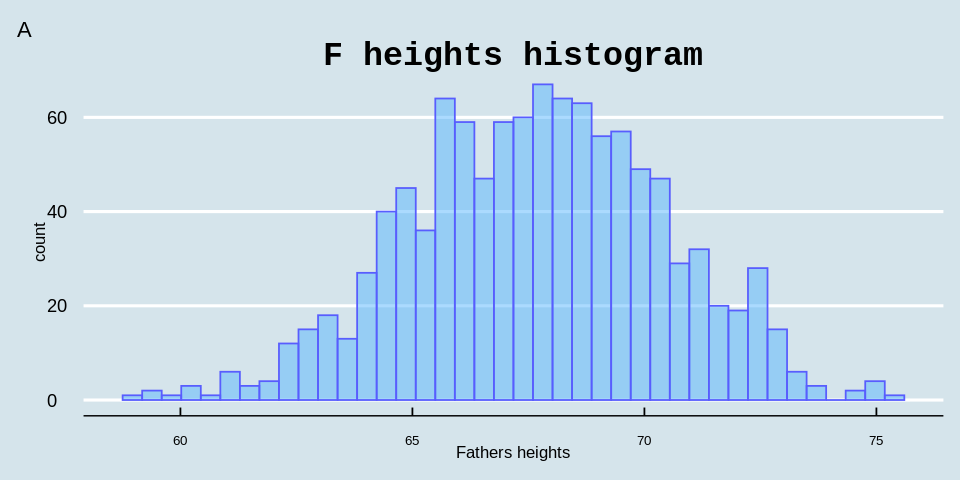

In [ ]:
p1 <- ggplot(df_fs_heights, aes(fheight)) + geom_histogram(bins=40, color='#585DFE', fill='#58B5FE', alpha=0.5) +
                                            theme_economist() +
                                            labs(title='F heights histogram',
                                                 x='Fathers heights', tag='A') +  # adding tag for multiple plots figure
                                            theme(plot.title=element_text(size=20, face='bold', hjust=0.5, family='CM Roman'),                                                  
                                                  axis.title.x=element_text(size=10),
                                                  axis.title.y=element_text(size=10),
                                                  axis.text.x = element_text(size=8))

plot(p1)

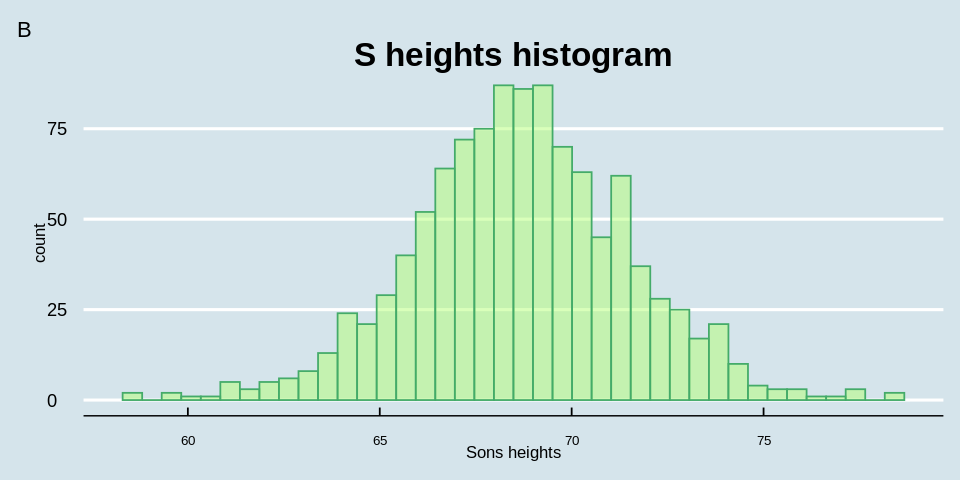

In [ ]:
p2 <- ggplot(df_fs_heights, aes(sheight)) + geom_histogram(bins=40, color='#44AB69', fill='#B3FF77', alpha=0.5) +
                                            theme_economist() +
                                            labs(title='S heights histogram',
                                                 x='Sons heights', tag='B') +
                                            theme(plot.title=element_text(size=20, face='bold', hjust=0.5),                                                  
                                                  axis.title.x=element_text(size=10),
                                                  axis.title.y=element_text(size=10),
                                                  axis.text.x = element_text(size=8))

plot(p2)

## Arranging graphs into one figure


In [ ]:
install.packages('cowplot')
library('cowplot')
# https://wilkelab.org/cowplot/articles/plot_grid.html

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



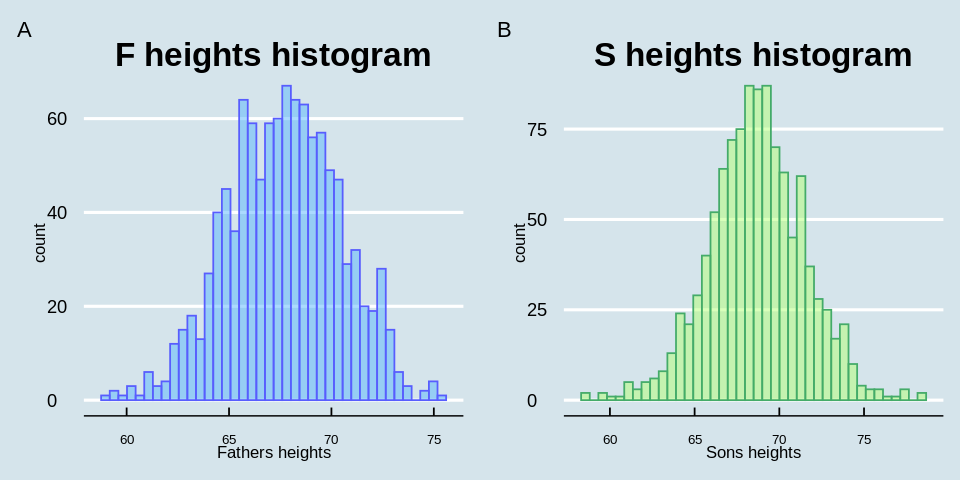

In [ ]:
options(repr.plot.width=8, repr.plot.height=4)

p <- plot_grid(p1, p2, labels='')# labels='AUTO' for adding tags
plot(p)
ggsave('hists.png', dpi=300, width=8, height=4)